CNN all in one model의 경우, 12가지의 class가 다 나오므로
confusion matrix를 통해 사람 구분 정확도와 모션 구분 정확도를 구해야 함
- 사람 구분: 빨간 박스 안의 수치 합 / 1800 (%)<br>
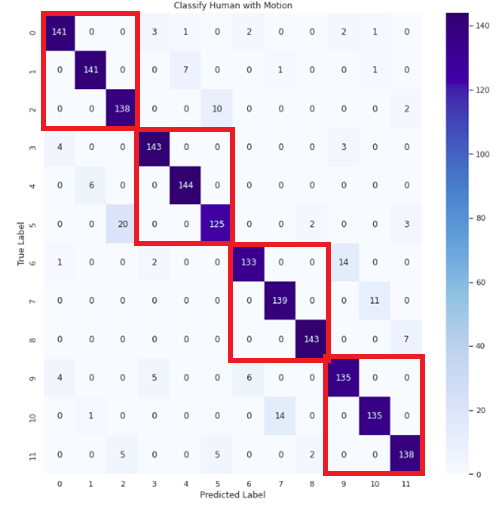
- 모션 구분: 빨간 박스 안의 수치 합 / 1800 (%) <br>
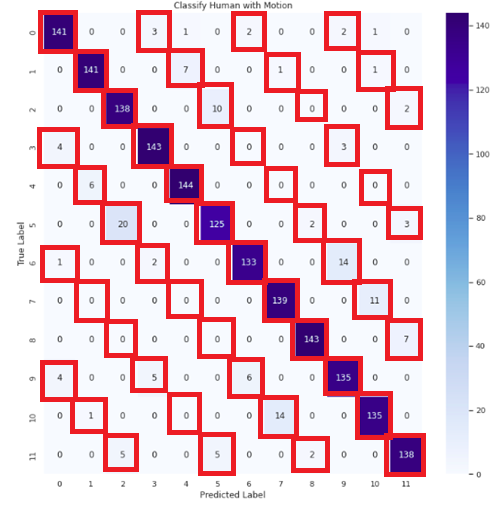<br>
3번째 cell의 convlayers와 denseparam 변수를 변경해보며 테스트

In [1]:
# setting for load google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Input, Flatten, Add, BatchNormalization, Activation, Input
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# parameters to change
convlayers = 4
denseparam = 128

augment_ratio = 9

classnum = 12     # class 개수

try_num = 10   # 같은 조건에서 몇번 반복할지

date = '220132'

count = 100

lr = 0.001
bs = 64
wsr = 0.15

test_label = np.zeros(classnum).reshape(1, classnum)
predict_label = np.zeros(classnum).reshape(1, classnum)

file_name = '_stft.txt'

start_row = 46
end_row = 82
scale_row = 1
rows = 128

start_col = 1
end_col = 29
scale_col = 1
cols = 29

# function for creating CNN model
def create_CNNmodel(img_row, img_col, classnum):
    model = Sequential()

    model.add(Conv2D(16, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(img_row, img_col, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
    if convlayers == 1:
          model.add(Flatten())
          model.add(Dense(denseparam, activation='relu'))
          model.add(Dense(classnum, activation='softmax'))
          model.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr), metrics=['accuracy'])
          return model

    model.add(Conv2D(16, kernel_size=(3, 3), strides=(1,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
    if convlayers == 2:
          model.add(Flatten())
          model.add(Dense(denseparam, activation='relu'))
          model.add(Dense(classnum, activation='softmax'))
          model.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr), metrics=['accuracy'])
          return model

    model.add(Conv2D(16, kernel_size=(3, 3), strides=(1,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
    if convlayers == 3:
          model.add(Flatten())
          model.add(Dense(denseparam, activation='relu'))
          model.add(Dense(classnum, activation='softmax'))
          model.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr), metrics=['accuracy'])
          return model

    model.add(Conv2D(16, kernel_size=(3, 3), strides=(1,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
    if convlayers == 4:
          model.add(Flatten())
          model.add(Dense(denseparam, activation='relu'))
          model.add(Dense(classnum, activation='softmax'))
          model.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr), metrics=['accuracy'])
          return model

def preprocessing(person, motion):  # person, motion에 해당하는 image 불러옴
    DirectoryPath = '/content/drive/MyDrive/dataset/'
    image = np.zeros(shape=(count, rows, cols, 1))
    label = []

    cwt_data = pd.read_csv(
        DirectoryPath + date + "_" + str(person) + "_" + str(motion) + file_name)
    for i in range(0, 100):
        df = np.fromstring(cwt_data['pixels'][i], dtype=int, sep=' ')
        df = np.reshape(df, (rows, cols, 1))
        image[i] = df
        if motion == 0:
            label.append(3 * (person - 1) + 0)
        else:
            label.append(3 * (person - 1) + motion - 1)

    return image, label


# 시작과 끝 좌표는 scale한 후의 좌표를 기준으로 함
def preprocessing_resize_crop(image, start_row, end_row, start_col, end_col, row_scale, col_scale):
    crop_image = image[:, 0:image.shape[1]
        :row_scale, 0:image.shape[2]:col_scale]
    crop_image = crop_image[:, start_row:end_row, start_col:end_col]
    return crop_image


# ratio비율로 각 data set을 합치고 순서도 섞음
def concatenate_n_div(image0, label0, image1, label1, image2, label2, image3, label3, image4, label4, image5, label5, image6, label6, image7, label7, image8, label8, image9, label9, image10, label10, image11, label11):
    train_ratio = 0.7
    val_ratio = 0.15
    test_ratio = 0.15  # 적용안됨

    x_train = np.concatenate(
        (image0[0:int(count*train_ratio)],
         image1[0:int(count*train_ratio)],
         image2[0:int(count*train_ratio)],
         image3[0:int(count*train_ratio)],
         image4[0:int(count*train_ratio)],
         image5[0:int(count*train_ratio)],
         image6[0:int(count*train_ratio)],
         image7[0:int(count*train_ratio)],
         image8[0:int(count*train_ratio)],
         image9[0:int(count*train_ratio)],
         image10[0:int(count*train_ratio)],
         image11[0:int(count*train_ratio)]))
    y_train = np.concatenate(
        (label0[0:int(count*train_ratio)],
         label1[0:int(count*train_ratio)],
         label2[0:int(count*train_ratio)],
         label3[0:int(count*train_ratio)],
         label4[0:int(count*train_ratio)],
         label5[0:int(count*train_ratio)],
         label6[0:int(count*train_ratio)],
         label7[0:int(count*train_ratio)],
         label8[0:int(count*train_ratio)],
         label9[0:int(count*train_ratio)],
         label10[0:int(count*train_ratio)],
         label11[0:int(count*train_ratio)]))
    x_val = np.concatenate((image0[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image1[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image2[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image3[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image4[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image5[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image6[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image7[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image8[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image9[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image10[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            image11[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)]))
    y_val = np.concatenate((label0[int(count*train_ratio):int(count*train_ratio + count*val_ratio)],
                            label1[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            label2[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            label3[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            label4[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            label5[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            label6[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            label7[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            label8[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            label9[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            label10[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)],
                            label11[int(count*train_ratio):int(count *
                                                              train_ratio + count*val_ratio)]))
    x_test = np.concatenate((image0[int(count*train_ratio + count*val_ratio): count],
                             image1[int(count*train_ratio +
                                        count*val_ratio): count],
                             image2[int(count*train_ratio +
                                        count*val_ratio): count],
                             image3[int(count*train_ratio +
                                        count*val_ratio): count],
                             image4[int(count*train_ratio +
                                        count*val_ratio): count],
                             image5[int(count*train_ratio +
                                        count*val_ratio): count],
                             image6[int(count*train_ratio +
                                        count*val_ratio): count],
                             image7[int(count*train_ratio + 
                                        count*val_ratio): count],
                             image8[int(count*train_ratio + 
                                        count*val_ratio): count],
                             image9[int(count*train_ratio + 
                                        count*val_ratio): count],
                             image10[int(count*train_ratio + 
                                        count*val_ratio): count],
                             image11[int(count*train_ratio + 
                                        count*val_ratio): count]))
    y_test = np.concatenate((label0[int(count*train_ratio + count*val_ratio): count],
                             label1[int(count*train_ratio +
                                        count*val_ratio): count],
                             label2[int(count*train_ratio +
                                        count*val_ratio): count],
                             label3[int(count*train_ratio +
                                        count*val_ratio): count],
                             label4[int(count*train_ratio +
                                        count*val_ratio): count],
                             label5[int(count*train_ratio +
                                        count*val_ratio): count],
                             label6[int(count*train_ratio +
                                        count*val_ratio): count],
                             label7[int(count*train_ratio + 
                                        count*val_ratio): count],
                             label8[int(count*train_ratio + 
                                        count*val_ratio): count],
                             label9[int(count*train_ratio + 
                                        count*val_ratio): count],
                             label10[int(count*train_ratio + 
                                        count*val_ratio): count],
                             label11[int(count*train_ratio + 
                                        count*val_ratio): count]))

    train_gen = ImageDataGenerator(
        width_shift_range=wsr
    )

    augment_size = int(augment_ratio * x_train.shape[0])
    randidx = np.random.randint(x_train.shape[0], size=augment_size)
    x_augmented = x_train[randidx].copy()
    y_augmented = y_train[randidx].copy()
    x_augmented, y_augmented = train_gen.flow(
        x_augmented, y_augmented,  batch_size=augment_size, shuffle=False).next()
    x_train = np.concatenate((x_train, x_augmented))
    y_train = np.concatenate((y_train, y_augmented))

    s = np.arange(x_train.shape[0])
    np.random.shuffle(s)
    x_train = x_train[s]
    y_train = y_train[s]

    s = np.arange(x_val.shape[0])
    np.random.shuffle(s)
    x_val = x_val[s]
    y_val = y_val[s]

    s = np.arange(x_test.shape[0])
    np.random.shuffle(s)
    x_test = x_test[s]
    y_test = y_test[s]

    return x_train, y_train, x_val, y_val, x_test, y_test


row_len = math.ceil((end_row - start_row))
col_len = math.ceil((end_col - start_col))

image1, label1 = preprocessing(1, 0)
image2, label2 = preprocessing(1, 2)
image3, label3 = preprocessing(1, 3)
image4, label4 = preprocessing(2, 0)
image5, label5 = preprocessing(2, 2)
image6, label6 = preprocessing(2, 3)
image7, label7 = preprocessing(3, 0)
image8, label8 = preprocessing(3, 2)
image9, label9 = preprocessing(3, 3)
image10, label10 = preprocessing(4, 0)
image11, label11 = preprocessing(4, 2)
image12, label12 = preprocessing(4, 3)

result_acc = 0

model = create_CNNmodel(row_len, col_len, classnum)

for i in range(try_num):
    print(str(i + 1) + ' repeat')

    # 순서를 섞음
    s = np.arange(image1.shape[0])
    np.random.shuffle(s)
    image1_shuff = image1[s]

    s = np.arange(image2.shape[0])
    np.random.shuffle(s)
    image2_shuff = image2[s]

    s = np.arange(image3.shape[0])
    np.random.shuffle(s)
    image3_shuff = image3[s]

    s = np.arange(image4.shape[0])
    np.random.shuffle(s)
    image4_shuff = image4[s]

    s = np.arange(image5.shape[0])
    np.random.shuffle(s)
    image5_shuff = image5[s]

    s = np.arange(image6.shape[0])
    np.random.shuffle(s)
    image6_shuff = image6[s]

    s = np.arange(image7.shape[0])
    np.random.shuffle(s)
    image7_shuff = image7[s]

    s = np.arange(image8.shape[0])
    np.random.shuffle(s)
    image8_shuff = image8[s]

    s = np.arange(image9.shape[0])
    np.random.shuffle(s)
    image9_shuff = image9[s]

    s = np.arange(image10.shape[0])
    np.random.shuffle(s)
    image10_shuff = image10[s]

    s = np.arange(image11.shape[0])
    np.random.shuffle(s)
    image11_shuff = image11[s]

    s = np.arange(image12.shape[0])
    np.random.shuffle(s)
    image12_shuff = image12[s]

    # 크기에 맞게 자름
    image1_crop = preprocessing_resize_crop(
        image1_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image2_crop = preprocessing_resize_crop(
        image2_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image3_crop = preprocessing_resize_crop(
        image3_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image4_crop = preprocessing_resize_crop(
        image4_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image5_crop = preprocessing_resize_crop(
        image5_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image6_crop = preprocessing_resize_crop(
        image6_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image7_crop = preprocessing_resize_crop(
        image7_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image8_crop = preprocessing_resize_crop(
        image8_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image9_crop = preprocessing_resize_crop(
        image9_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image10_crop = preprocessing_resize_crop(
        image10_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image11_crop = preprocessing_resize_crop(
        image11_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)
    image12_crop = preprocessing_resize_crop(
        image12_shuff, start_row, end_row, start_col, end_col, scale_row, scale_col)

    # 자른 image를 각 data set으로 나눠서 합침
    x_train, y_train, x_val, y_val, x_test, y_test = concatenate_n_div(
        image1_crop, label1, image2_crop, label2, image3_crop, label3, image4_crop, label4, image5_crop, label5, image6_crop, label6, image7_crop, label7, image8_crop, label8, image9_crop, label9, image10_crop, label10, image11_crop, label11, image12_crop, label12)

    maxval = x_train.max()
    if maxval < x_val.max():
        maxval = x_val.max()
    if maxval < x_test.max():
        maxval = x_test.max()

    # 정규화
    x_train = x_train.astype('float32')/maxval
    x_val = x_val.astype('float32')/maxval
    x_test = x_test.astype('float32')/maxval

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)
    y_train = np_utils.to_categorical(y_train, classnum)
    y_val = np_utils.to_categorical(y_val, classnum)
    y_test = np_utils.to_categorical(y_test, classnum)

    # CNN 훈련
    hist = model.fit(x_train, y_train, validation_data=(
        x_val, y_val), epochs=50, callbacks=[early_stopping], verbose=0, batch_size=bs)

    # 평가
    # print('Evaluate')
    score = model.evaluate(x_test, y_test)
    # print('Test loss:', score[0])
    # print('Test accuracy:', score[1])
    result_acc = result_acc + score[1]    # 정확도 결과 저장하여 평균값 내는데 사용

    test_label = np.concatenate((test_label, y_test))
    pred = model.predict(x_test)
    predict_label = np.concatenate((predict_label, pred))

print('image size :', str(row_len)+'X'+str(col_len), '   row =', str(start_row)+' : '+str(end_row), '   col =', str(start_col)+' : '+str(end_col),
      '   round :', try_num, '//  average_acc :', result_acc / try_num)

test_label = np.delete(test_label, 0, axis=0)
predict_label = np.delete(predict_label, 0, axis=0)
sns.set(style='white')
plt.figure(figsize=(classnum, classnum))
cm = confusion_matrix(np.argmax(test_label[:int(test_label.shape[0])], axis=1),
                      np.argmax(predict_label[:int(predict_label.shape[0])], axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Classify Human with Motion')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(model.summary())